# Clustering Cities from Night-Time Satellite Images

This project involves analyzing a night-time satellite image to identify clusters of lights, which represent cities. The process uses a custom K-Means clustering algorithm to achieve this and includes a method to determine the optimal number of clusters using the Elbow Method.

## Steps Involved

### 1. Read the Image
The first step is to read the grayscale image and convert it into a 2D NumPy array.


In [1]:
import numpy as np
from PIL import Image
import random
import matplotlib.pyplot as plt

def img_array(filename):
    img = Image.open(filename).convert('L')  
    return np.array(img)

### 2.Identify Lit Pixels
Next, identify the coordinates of the lit pixels in the image using a threshold.

In [2]:
def find_lit_pixels(image, threshold=100):
    lit_pixels = np.where(image > threshold)
    return list(zip(lit_pixels[0], lit_pixels[1]))

### 3. Custom K-Means Algorithm
Implement the K-Means algorithm from scratch to cluster the pixel coordinates.

**Initialize Centroids**
Randomly select initial centroids from the data points.

**Assign to Clusters**
Assign each data point to the nearest centroid.

**Update Centroids**
Update the centroids based on the mean of the points in each cluster.

#### 4. K-Means Function
Combine the steps to perform the K-Means clustering.

In [3]:
def initialize_centroids(data, k):
    return [tuple(point) for point in random.sample(data, k)]

def assign_to_clusters(data, centroids):
    clusters = {centroid: [] for centroid in centroids}
    for point in data:
        nearest_centroid = min(centroids, key=lambda x: np.linalg.norm(np.array(point) - np.array(x)))
        clusters[nearest_centroid].append(point)
    return clusters

def update_centroids(clusters):
    new_centroids = []
    for centroid, points in clusters.items():
        if points:  
            new_centroid = tuple(np.mean(points, axis=0))
            new_centroids.append(new_centroid)
        else:  
            new_centroids.append(centroid)
    return new_centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_to_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

def calculate_square_sum(data, centroids, clusters):
    square_sum = 0
    for centroid, points in clusters.items():
        square_sum += sum(np.linalg.norm(np.array(point) - np.array(centroid))**2 for point in points)
    return square_sum



### 4. Elbow Method for Optimal Clusters
Determine the optimal number of clusters using the Elbow Method.

**Calculate Total Distance**
Calculate the total distance within clusters.

**Elbow Method**
Run the Elbow Method to find the optimal number of clusters.

**Plot Elbow Graph**
Plot the Elbow Method graph to visualize the optimal number of clusters.

In [4]:
def elbow_method(data, max_k=10):
    square_sum_values = []
    for k in range(1, max_k + 1):
        centroids, clusters = k_means(data, k)
        square_sum = calculate_square_sum(data, centroids, clusters)
        square_sum_values.append(square_sum)
    return square_sum_values

def elbow_point(square_sum_values):
    x = np.arange(1, len(square_sum_values) + 1)
    y = np.array(square_sum_values)

    line = np.linspace(square_sum_values[0], square_sum_values[-1], len(square_sum_values))

    distances = np.abs(y - line)

    optimal_k = np.argmax(distances) + 1
    return optimal_k

def plot_elbow(square_sum_values, optimal_k):
    plt.plot(range(1, len(square_sum_values) + 1), square_sum_values, 'bo-')
    plt.axvline(optimal_k, color='red', linestyle='--')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (square_sum)')
    plt.title('Elbow Method for Optimal K')
    plt.show()


### 5. Calculate Distances Between Centroids
Calculate the distances between the centroids of the clusters.

**Print Distances**
Print the distances between the cities in a clear format.

In [5]:
def coordinates(image, num_clusters):
    lit_pixels = find_lit_pixels(image)
    centroids, clusters = k_means(lit_pixels, num_clusters)
    return centroids, clusters

def dist(centroids):
    distances = {}
    for i, centroid1 in enumerate(centroids):
        for j, centroid2 in enumerate(centroids):
            if i < j:
                distance = np.linalg.norm(np.array(centroid1) - np.array(centroid2))
                distances[f'City{i+1} to City{j+1}'] = distance
    return distances

def print_dist(distances):
    for cities, distance in distances.items():
        print(f'{cities}: {distance:.2f} units')


This code will read the image, identify the lit pixels, determine the optimal number of clusters using the Elbow Method, perform K-Means clustering, calculate the distances between the identified city clusters, and print these distances.

# For image 1.

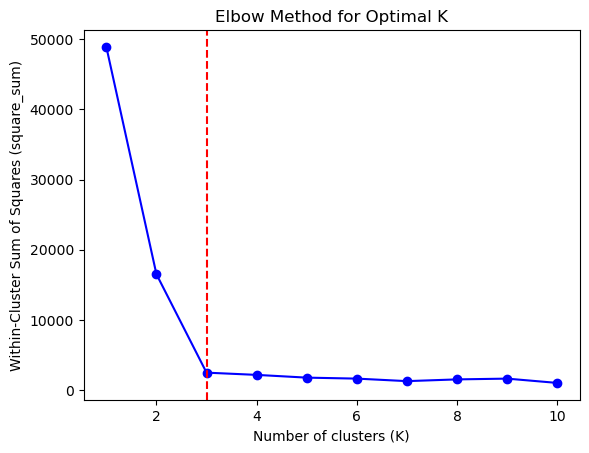

City1 to City2: 44.16 units
City1 to City3: 26.08 units
City2 to City3: 24.97 units


In [6]:
image_filename = 'images/1.jpg'
image = img_array(image_filename)

lit_pixels = find_lit_pixels(image)

square_sum_values = elbow_method(lit_pixels, max_k=10)
optimal_k = elbow_point(square_sum_values)
plot_elbow(square_sum_values, optimal_k)

centroids, _ = coordinates(image, optimal_k)
distances = dist(centroids)
print_dist(distances)


# For image 2.

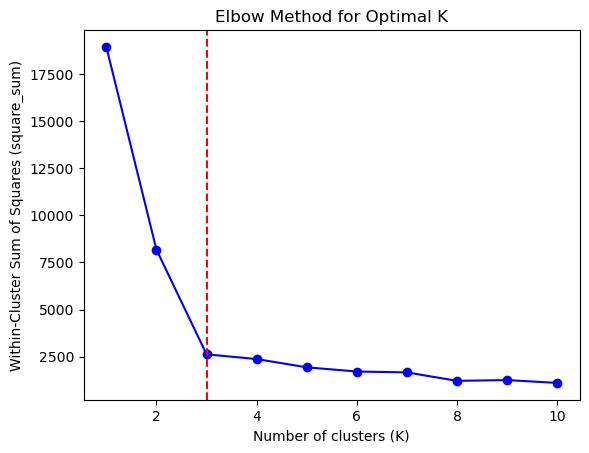

City1 to City2: 21.92 units
City1 to City3: 17.83 units
City2 to City3: 22.96 units


In [7]:
image_filename = 'images/2.jpg'
image = img_array(image_filename)

lit_pixels = find_lit_pixels(image)

square_sum_values = elbow_method(lit_pixels, max_k=10)
optimal_k = elbow_point(square_sum_values)
plot_elbow(square_sum_values, optimal_k)

centroids, _ = coordinates(image, optimal_k)
distances = dist(centroids)
print_dist(distances)

# For image 3.

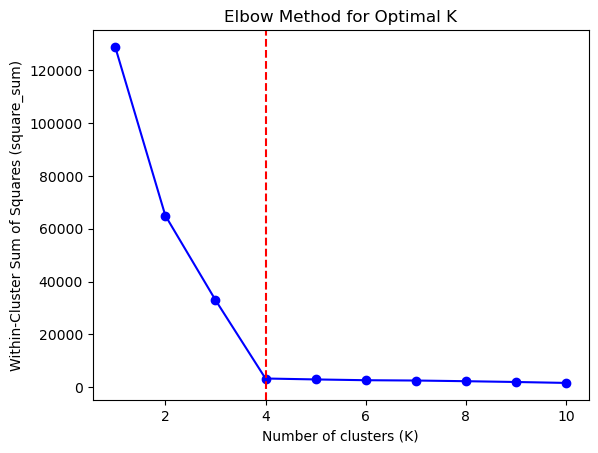

City1 to City2: 39.26 units
City1 to City3: 45.45 units
City1 to City4: 19.05 units
City2 to City3: 44.37 units
City2 to City4: 22.62 units
City3 to City4: 47.43 units


In [8]:
image_filename = 'images/3.jpg'
image = img_array(image_filename)

lit_pixels = find_lit_pixels(image)

square_sum_values = elbow_method(lit_pixels, max_k=10)
optimal_k = elbow_point(square_sum_values)
plot_elbow(square_sum_values, optimal_k)

centroids, _ = coordinates(image, optimal_k)
distances = dist(centroids)
print_dist(distances)

# For image 4.

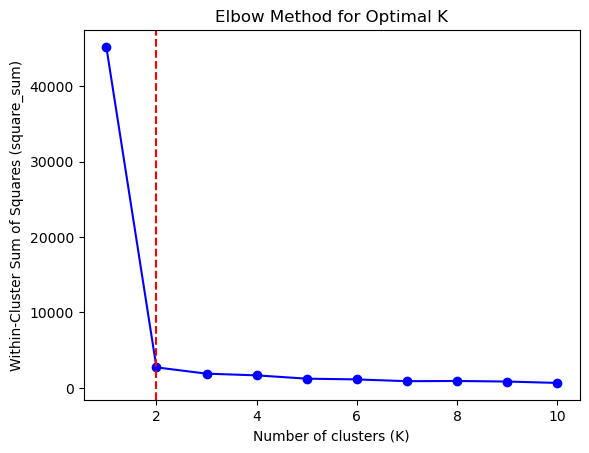

City1 to City2: 40.68 units


In [9]:
image_filename = 'images/4.jpg'
image = img_array(image_filename)

lit_pixels = find_lit_pixels(image)

square_sum_values = elbow_method(lit_pixels, max_k=10)
optimal_k = elbow_point(square_sum_values)
plot_elbow(square_sum_values, optimal_k)

centroids, _ = coordinates(image, optimal_k)
distances = dist(centroids)
print_dist(distances)